In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [248]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [223]:
train.shape

(1460, 81)

In [224]:
test.shape

(1459, 80)

In [225]:
[list(train),list(test)]
#looking at the column names in both train and test , only difference is SalePrice (which is the target variable). we are good

[['Id',
  'MSSubClass',
  'MSZoning',
  'LotFrontage',
  'LotArea',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'MasVnrArea',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinSF1',
  'BsmtFinType2',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'KitchenQual',
  'TotRmsAbvGrd',
  'Functional',
  'Fireplaces',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageCars',
  'GarageArea',
  'GarageQu

In [226]:
# Lets combine the train and test for data processing
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [227]:
import numpy as np

In [368]:
train_no_SalePrice=train.loc[:,train.columns!='SalePrice']
train_y=train['SalePrice']

In [255]:
train_test=pd.concat([train_no_SalePrice,test])

In [258]:
# 1460+145 = 2919
train_test.shape

(2919, 80)

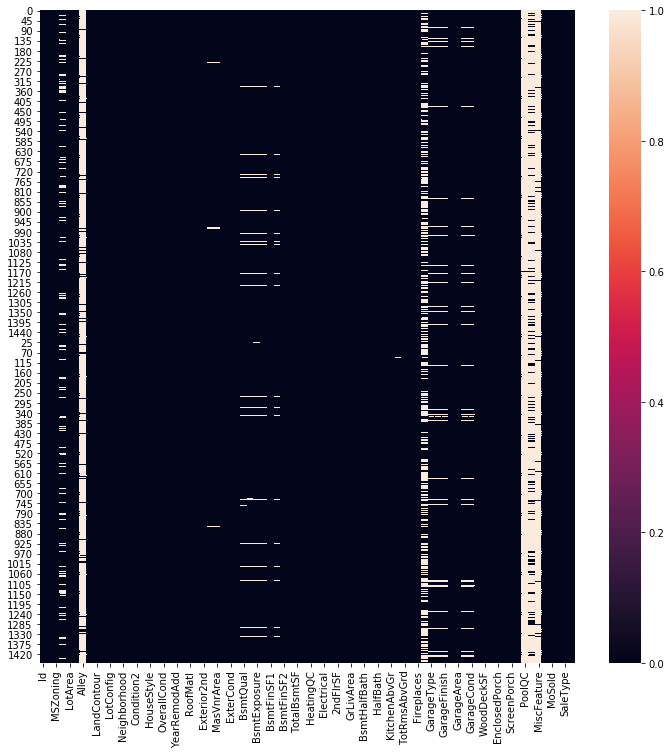

In [263]:
plt.figure(figsize=(12,12))
sns.heatmap(train_test.isnull())

In [322]:
train_test.isnull().sum().sort_values(ascending=False)

Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF1          1
SaleType            1
Exterior2nd         1
Exterior1st         1
Electrical          1
BsmtFinSF2          1
KitchenQual         1
                 ... 
HouseStyle          0
SaleCondition       0
Heating             0
ExterCond           0
PavedDrive          0
YrSold              0
MoSold              0
MiscVal             0
MiscFeature         0
PoolQC              0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchS

In [315]:
# Lets replace NAN in PoolQC to 'Fa' since only 3 values are missing when PoolArea>0 also probably there is no Pool
train_test.loc[(train_test['PoolArea']>0) & (train_test['PoolQC'].isnull()),['PoolQC']]='Fa'

In [318]:
# Since remaining PoolQC is null because , no pools in the house , replace nulls with 'None'
train_test.loc[(train_test['PoolQC'].isnull()),['PoolQC']]='None'

In [320]:
# Probably there is no MiscFeature , replace nulls with 'None'
train_test.loc[(train_test['MiscFeature'].isnull()),['MiscFeature']]='None'

In [323]:
#Lets fill the null with NA for below 3 features
train_test['Alley']=train_test['Alley'].fillna('None')
train_test['Fence']=train_test['Fence'].fillna('None')
train_test['FireplaceQu']=train_test['FireplaceQu'].fillna('None')

In [327]:
# LotFrontage: Linear feet of street connected to property
# Hence lets take the median of the property connected to the street by Neighborhood
train_test['LotFrontage']=train_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [329]:
for col in ['GarageCond','GarageType','GarageFinish','GarageQual']:
    train_test[col]=train_test[col].fillna('None')

In [331]:
for col in ['GarageYrBlt','GarageCars','GarageArea']:
    train_test[col]=train_test[col].fillna(0)

In [333]:
for col in ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']:
    train_test[col]=train_test[col].fillna('None')

In [335]:
for col in ['MasVnrArea']:
    train_test[col]=train_test[col].fillna(0)

In [337]:
for col in ['MasVnrType']:
    train_test[col]=train_test[col].fillna('None')

In [343]:
# Since only 4 NULLS , replcae it with Mode 
# train_test.MSZoning.mode()[0] = 'RL'
train_test['MSZoning']=train_test['MSZoning'].fillna('RL')

In [346]:
# Replace Nulls with Mode
# train_test.Utilities.value_counts()
# AllPub    2916
# NoSeWa       1
# Name: Utilities, dtype: int64
#

train_test['Utilities']=train_test['Utilities'].fillna('AllPub')

In [349]:
# Replace Nulls with Mode
# train_test.Functional.value_counts()
# Typ     2717
# Min2      70
# Min1      65
# Mod       35
# Maj1      19
# Maj2       9
# Sev        2
# Name: Functional, dtype: int64

train_test['Functional']=train_test['Functional'].fillna('Typ')

In [353]:
# Replace all the null values with mode
for col in ['BsmtFullBath','BsmtHalfBath','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SaleType','BsmtFinSF1','Exterior1st','Electrical','Exterior2nd','KitchenQual']:
    fill_value=train_test[col].mode()[0]
    train_test[col]=train_test[col].fillna(fill_value)

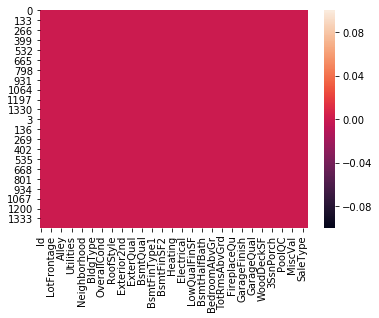

In [355]:
sns.heatmap(train_test.isnull())

In [363]:
#droping Id column in train_test as it is not useful
train_test.drop(columns=['Id'],inplace=True)

In [364]:
dummy_train_test=pd.get_dummies(train_test)

In [381]:
dummy_train=dummy_train_test[:train.shape[0]]
dummy_test=dummy_train_test[train.shape[0]:]

In [378]:
from sklearn.linear_model import LinearRegression

In [379]:
lr=LinearRegression()

In [380]:
lr.fit(dummy_train,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [385]:
#Model score in Training dataset
lr.score(dummy_train,train_y)*100

93.32012119547521

In [386]:
prediction=list(lr.predict(dummy_test))

In [389]:
pd.DataFrame({'Prediction':prediction}).to_csv('submission.csv')